In [789]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2.0 - EDA uppvärmning

In [790]:
# load in datas
cardio_train = pd.read_csv("cardio_train.csv", sep=";")
cardio_train.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [791]:
cardio_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [792]:
disease_count = cardio_train.cardio.value_counts()
print(f"Number of positive is: {disease_count[1]}")
print(f"Number of negative is: {disease_count[0]}")


Number of positive is: 34979
Number of negative is: 35021


In [793]:
cardio_train[["cholesterol"]].value_counts()

cholesterol
1              52385
2               9549
3               8066
dtype: int64

Text(0.5, 1.0, 'Kolesterolvärden')

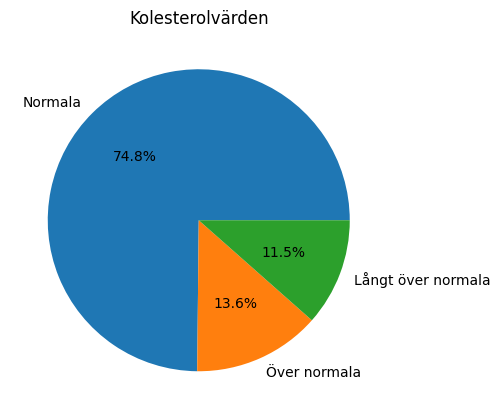

In [794]:
plt.figure(figsize=(5,5), dpi=100)
plt.pie(cardio_train[["cholesterol"]].value_counts(), autopct="%1.1f%%", labels=["Normala", "Över normala", "Långt över normala"])
plt.title("Kolesterolvärden")

Text(0.5, 1.0, 'Age distribution')

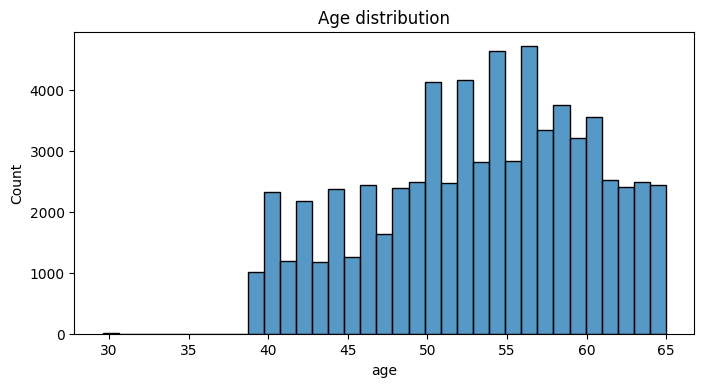

In [795]:
cardio_train["age"] = round(cardio_train["age"]/365, 1)
plt.figure(figsize=(8,4), dpi=100)
sns.histplot(cardio_train["age"], bins=35)
plt.title("Age distribution")

In [796]:
smoke_percent = (cardio_train[["smoke"]].value_counts()[1]/cardio_train[["smoke"]].count())*100
smoke_percent
# About 8.8% smokers

smoke    8.812857
dtype: float64

Text(0.5, 1.0, 'Weight distribution')

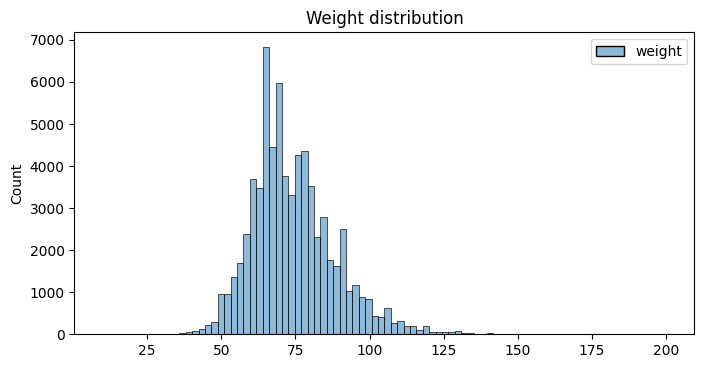

In [797]:
plt.figure(figsize=(8,4), dpi=100)
sns.histplot(cardio_train[["weight"]], bins=88)
plt.title("Weight distribution")

Text(0.5, 1.0, 'Height distribution')

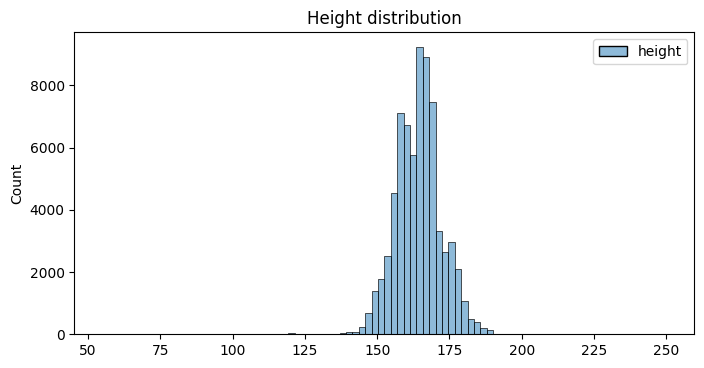

In [798]:
plt.figure(figsize=(8,4), dpi=100)
sns.histplot(cardio_train[["height"]], bins=88)
plt.title("Height distribution")

Text(0.5, 1.0, 'Disease in gender')

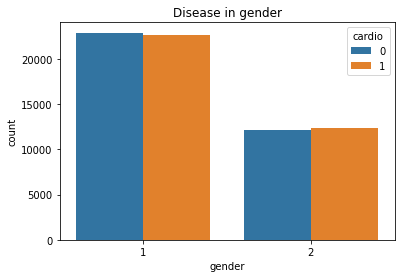

In [799]:
sns.countplot(x='gender',hue="cardio",data=cardio_train)
plt.title("Disease in gender")

## 2.1.0 - Feature engineering BMI


In [800]:
cardio_train["BMI"] = cardio_train["weight"]/((cardio_train["height"]/100)**2)
cardio_train

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,0,50.4,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,1,55.4,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,2,51.7,1,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,3,48.3,2,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,4,47.9,1,156,56.0,100,60,1,1,0,0,0,0,23.011177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,52.7,2,168,76.0,120,80,1,1,1,0,1,0,26.927438
69996,99995,61.9,1,158,126.0,140,90,2,2,0,0,1,1,50.472681
69997,99996,52.2,2,183,105.0,180,90,3,1,0,1,0,1,31.353579
69998,99998,61.5,1,163,72.0,135,80,1,2,0,0,0,1,27.099251


In [801]:
cardio_train["BMI"].describe()

count    70000.000000
mean        27.556513
std          6.091511
min          3.471784
25%         23.875115
50%         26.374068
75%         30.222222
max        298.666667
Name: BMI, dtype: float64

<AxesSubplot:>

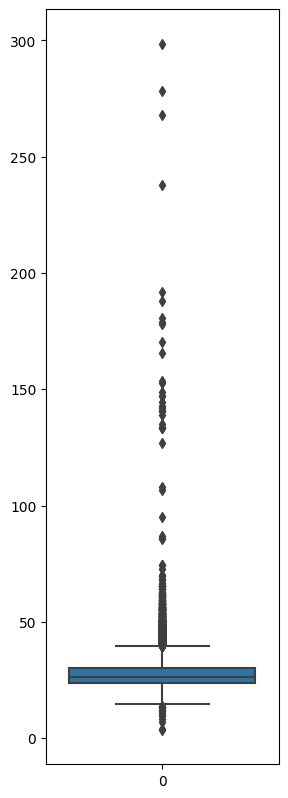

In [802]:
plt.figure(figsize=(3,10), dpi = 100)
sns.boxplot(data = cardio_train["BMI"])
# boxplot for BMI

The distribution of BMI has a skew and we keep the values within mean ± 3 $\sigma$, which 99.7% of the dataset included but outliers droped.

In [803]:
BMI_mean = cardio_train["BMI"].mean()
BMI_std = cardio_train["BMI"].std()

cardio_train_BMI = cardio_train[(BMI_mean-3*BMI_std < cardio_train["BMI"]) & (BMI_mean+3*BMI_std > cardio_train["BMI"])]
cardio_train_BMI.BMI.describe()

count    69464.000000
mean        27.328387
std          4.903914
min          9.331007
25%         23.875115
50%         26.314635
75%         30.110279
max         45.820235
Name: BMI, dtype: float64

Notice here the max value is down to 45 and total counts only reduced by 532. It means that the proportion of outliers is small but big impact on data.

In [804]:
def BIM_categories(BMI):
    if BMI < 18.5:
        return 'Underweight'
    elif 18.5 <= BMI < 25:
        return 'Normal_range'
    elif 25.0 <= BMI < 30:
        return 'Overweight'
    elif 30.0 <= BMI < 35:
        return 'Obese_1'
    elif 35.0 <= BMI < 40:
        return 'Obese_2'
    else:
        return 'Obese_3'

In [805]:
cardio_train_BMI["BIM_categories"] = cardio_train_BMI[["BMI"]].apply(lambda x: BIM_categories(*x), axis= 1)
cardio_train_BMI

C:\Users\Kun\AppData\Local\Temp\ipykernel_15916\635540010.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cardio_train_BMI["BIM_categories"] = cardio_train_BMI[["BMI"]].apply(lambda x: BIM_categories(*x), axis= 1)


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,BIM_categories
0,0,50.4,2,168,62.0,110,80,1,1,0,0,1,0,21.967120,Normal_range
1,1,55.4,1,156,85.0,140,90,3,1,0,0,1,1,34.927679,Obese_1
2,2,51.7,1,165,64.0,130,70,3,1,0,0,0,1,23.507805,Normal_range
3,3,48.3,2,169,82.0,150,100,1,1,0,0,1,1,28.710479,Overweight
4,4,47.9,1,156,56.0,100,60,1,1,0,0,0,0,23.011177,Normal_range
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,99992,57.7,1,165,80.0,150,80,1,1,0,0,1,1,29.384757,Overweight
69995,99993,52.7,2,168,76.0,120,80,1,1,1,0,1,0,26.927438,Overweight
69997,99996,52.2,2,183,105.0,180,90,3,1,0,1,0,1,31.353579,Obese_1
69998,99998,61.5,1,163,72.0,135,80,1,2,0,0,0,1,27.099251,Overweight


## 2.1.1 - Feature engineering blodtryck


In [806]:
cardio_train_BMI["ap_hi"].describe(), cardio_train_BMI["ap_lo"].describe()

(count    69464.000000
 mean       128.750763
 std        154.588251
 min       -150.000000
 25%        120.000000
 50%        120.000000
 75%        140.000000
 max      16020.000000
 Name: ap_hi, dtype: float64,
 count    69464.000000
 mean        96.401704
 std        188.411924
 min        -70.000000
 25%         80.000000
 50%         80.000000
 75%         90.000000
 max      11000.000000
 Name: ap_lo, dtype: float64)

<AxesSubplot:>

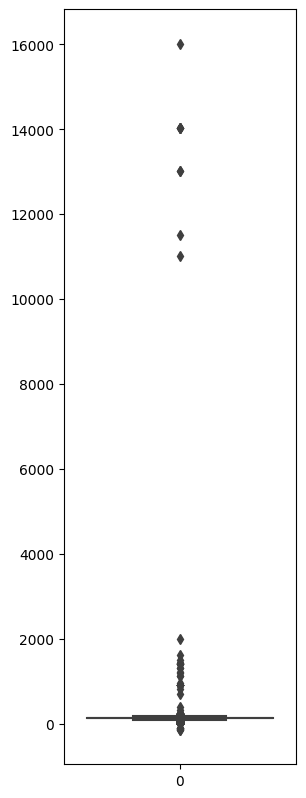

In [807]:
plt.figure(figsize=(3,10), dpi = 100)
sns.boxplot(data = cardio_train_BMI["ap_hi"])

<AxesSubplot:>

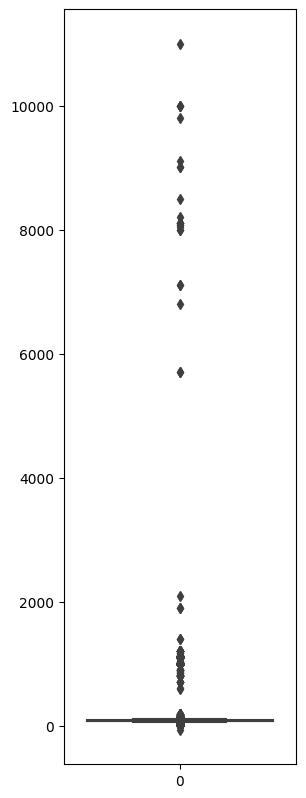

In [808]:
plt.figure(figsize=(3,10), dpi = 100)
sns.boxplot(data = cardio_train_BMI["ap_lo"])

- The distributions of ap_hi and ap_lo is highly skewed by some outliers and $std$ is also large consequently. 
- Based on the healthline's description of blood pressure, I decided to remove some extreme values.
- When systolic is over 250 or diastolic over 200, and systolic less than 50 or diastolic less than 30 can lead to human shock/death, so the values beyond the range is no reference value.

In [809]:
cardio_train_BMI_BP = cardio_train_BMI[(cardio_train_BMI["ap_hi"] < 250) & (cardio_train_BMI["ap_lo"] < 200) & (cardio_train_BMI["ap_hi"]> 50) & (cardio_train_BMI["ap_lo"] > 30)]

cardio_train_BMI_BP["ap_hi"].describe(), cardio_train_BMI_BP["ap_lo"].describe()

(count    68266.000000
 mean       126.535098
 std         16.702516
 min         60.000000
 25%        120.000000
 50%        120.000000
 75%        140.000000
 max        240.000000
 Name: ap_hi, dtype: float64,
 count    68266.000000
 mean        81.343670
 std          9.649944
 min         40.000000
 25%         80.000000
 50%         80.000000
 75%         90.000000
 max        190.000000
 Name: ap_lo, dtype: float64)

In [810]:
def BP_categories(systolic, diastolic):
    if systolic > 180 or diastolic > 120:
        return 'Crisis'
    elif (140 <= systolic < 180) or (90 <= diastolic < 120):
        return 'HBP_stage2'
    elif (130 <= systolic < 140) or (80 <= diastolic < 90) :
        return 'HBP_stage1'
    elif (120 <= systolic < 130) and diastolic < 80:
        return 'Elevated'
    else:
        return 'Healthy'

In [811]:
cardio_train_BMI_BP['HTN_stage'] = cardio_train_BMI_BP[['ap_hi', 'ap_lo']].apply(lambda x: BP_categories(*x), axis= 1)
cardio_train_BMI_BP

C:\Users\Kun\AppData\Local\Temp\ipykernel_15916\2034785894.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cardio_train_BMI_BP['HTN_stage'] = cardio_train_BMI_BP[['ap_hi', 'ap_lo']].apply(lambda x: BP_categories(*x), axis= 1)


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,BIM_categories,HTN_stage
0,0,50.4,2,168,62.0,110,80,1,1,0,0,1,0,21.967120,Normal_range,HBP_stage1
1,1,55.4,1,156,85.0,140,90,3,1,0,0,1,1,34.927679,Obese_1,HBP_stage2
2,2,51.7,1,165,64.0,130,70,3,1,0,0,0,1,23.507805,Normal_range,HBP_stage1
3,3,48.3,2,169,82.0,150,100,1,1,0,0,1,1,28.710479,Overweight,HBP_stage2
4,4,47.9,1,156,56.0,100,60,1,1,0,0,0,0,23.011177,Normal_range,Healthy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,99992,57.7,1,165,80.0,150,80,1,1,0,0,1,1,29.384757,Overweight,HBP_stage2
69995,99993,52.7,2,168,76.0,120,80,1,1,1,0,1,0,26.927438,Overweight,HBP_stage1
69997,99996,52.2,2,183,105.0,180,90,3,1,0,1,0,1,31.353579,Obese_1,HBP_stage2
69998,99998,61.5,1,163,72.0,135,80,1,2,0,0,0,1,27.099251,Overweight,HBP_stage1


-  Categarical method reference to 
- https://www.kaggle.com/code/cassienutter/cvd-classification-with-eda-models-hyperparams

## 2.2.0 - Visualiseringar andel sjukdomar


Text(0.5, 0.98, 'Features against the proportion positive for cardiovascular disease')

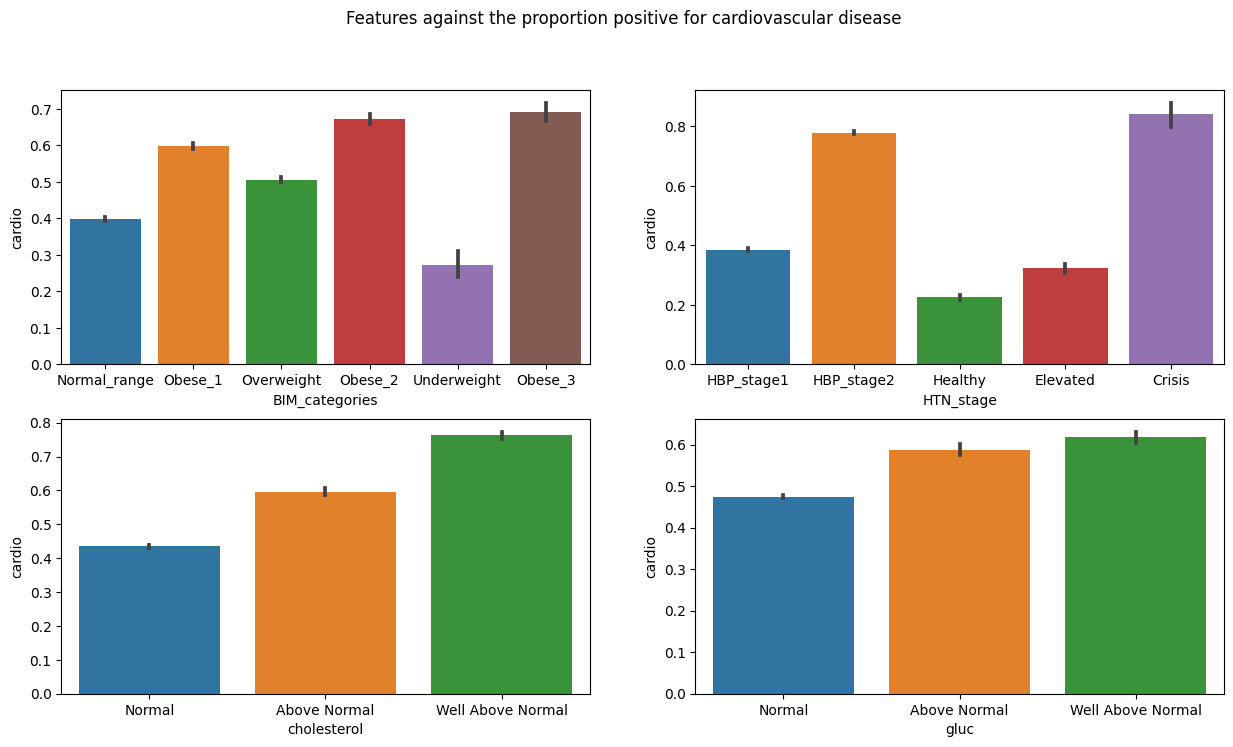

In [812]:
fig, axes = plt.subplots(2, 2, figsize=(15, 8), dpi=100)
sns.barplot(data = cardio_train_BMI_BP, x = "BIM_categories", y = "cardio", ax = axes[0,0])
sns.barplot(data = cardio_train_BMI_BP, x = "HTN_stage", y = "cardio", ax = axes[0,1])
sns.barplot(data = cardio_train_BMI_BP, x = "cholesterol", y = "cardio", ax = axes[1,0]).set_xticklabels(["Normal", "Above Normal", "Well Above Normal"])
sns.barplot(data = cardio_train_BMI_BP, x = "gluc", y = "cardio", ax = axes[1,1]).set_xticklabels(["Normal", "Above Normal", "Well Above Normal"])

fig.suptitle("Features against the proportion positive for cardiovascular disease")

## 2.2.1 - Visualiseringar korrelation

In [813]:
cardio_train_corr = cardio_train_BMI_BP.drop(columns=['id', 'BIM_categories', 'HTN_stage'])
cardio_train_corr

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,50.4,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,55.4,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,51.7,1,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,48.3,2,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,47.9,1,156,56.0,100,60,1,1,0,0,0,0,23.011177
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,57.7,1,165,80.0,150,80,1,1,0,0,1,1,29.384757
69995,52.7,2,168,76.0,120,80,1,1,1,0,1,0,26.927438
69997,52.2,2,183,105.0,180,90,3,1,0,1,0,1,31.353579
69998,61.5,1,163,72.0,135,80,1,2,0,0,0,1,27.099251


Text(0.5, 1.0, 'Correlation between Features')

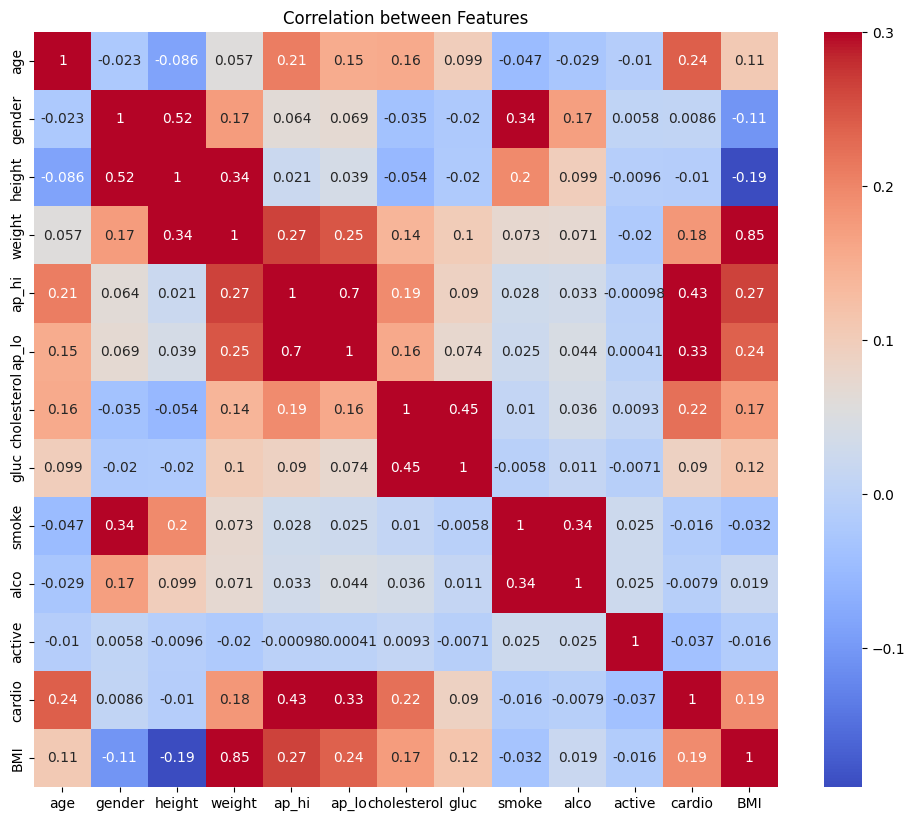

In [814]:
plt.figure(figsize=(12,10), dpi = 100)
sns.heatmap(cardio_train_corr.corr(), vmax=.3, annot=True, cmap= 'coolwarm')
plt.title("Correlation between Features")

### |corr| > 0.4 :
- weight vs BMI $(corr = 0.85)$ : Fat is one of the causation of high BMI
- height vs gender $(corr = 0.52)$: males is more higher than females on average
- cardio vs ap_hi & ap_lo $(corr = 0.43, 0.33)$ : cardiovascular disease seems a slightly relation with blood pressure
- Glucose vs cholesterol $(corr = 0.45)$: Glucose intake has a certain effect on cholesterol levels.
- ap_hi vs ap_lo $(corr = 0.7)$: Bloodpressure(High_Low) highly cooralated each other. 

## 2.3 - Skapa två dataset

### dataset 1

In [815]:
df_categorical_1 = cardio_train_BMI_BP.drop(["ap_hi", "ap_lo", "height", "weight", "BMI"], axis=1)
df_categorical_1[:1]

,id,age,gender,cholesterol,gluc,smoke,alco,active,cardio,BIM_categories,HTN_stage
0,0,50.4,2,1,1,0,0,1,0,Normal_range,HBP_stage1


In [816]:
df_categorical_dummies_1 = pd.get_dummies(df_categorical_1, columns=["gender", "cholesterol", "gluc", "BIM_categories", "HTN_stage"])
df_categorical_dummies_1[:5]

,id,age,smoke,alco,active,cardio,gender_1,gender_2,cholesterol_1,cholesterol_2,...,BIM_categories_Obese_1,BIM_categories_Obese_2,BIM_categories_Obese_3,BIM_categories_Overweight,BIM_categories_Underweight,HTN_stage_Crisis,HTN_stage_Elevated,HTN_stage_HBP_stage1,HTN_stage_HBP_stage2,HTN_stage_Healthy
0,0,50.4,0,0,1,0,0,1,1,0,...,0,0,0,0,0,0,0,1,0,0
1,1,55.4,0,0,1,1,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,2,51.7,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,3,48.3,0,0,1,1,0,1,1,0,...,0,0,0,1,0,0,0,0,1,0
4,4,47.9,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [817]:
df_categorical_dummies_1.columns

Index(['id', 'age', 'smoke', 'alco', 'active', 'cardio', 'gender_1',
       'gender_2', 'cholesterol_1', 'cholesterol_2', 'cholesterol_3', 'gluc_1',
       'gluc_2', 'gluc_3', 'BIM_categories_Normal_range',
       'BIM_categories_Obese_1', 'BIM_categories_Obese_2',
       'BIM_categories_Obese_3', 'BIM_categories_Overweight',
       'BIM_categories_Underweight', 'HTN_stage_Crisis', 'HTN_stage_Elevated',
       'HTN_stage_HBP_stage1', 'HTN_stage_HBP_stage2', 'HTN_stage_Healthy'],
      dtype='object')

### dataset 2

In [818]:
df_categorical_2 = cardio_train_BMI_BP.drop(["BIM_categories", "HTN_stage", "height", "weight"], axis=1)
df_categorical_2[:1]

,id,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,0,50.4,2,110,80,1,1,0,0,1,0,21.96712


In [819]:
df_categorical_dummies_2 = pd.get_dummies(df_categorical_2, columns=["gender"])
df_categorical_dummies_2[:5]

,id,age,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,gender_1,gender_2
0,0,50.4,110,80,1,1,0,0,1,0,21.967120,0,1
1,1,55.4,140,90,3,1,0,0,1,1,34.927679,1,0
2,2,51.7,130,70,3,1,0,0,0,1,23.507805,1,0
3,3,48.3,150,100,1,1,0,0,1,1,28.710479,0,1
4,4,47.9,100,60,1,1,0,0,0,0,23.011177,1,0


In [820]:
df_categorical_dummies_2.columns

Index(['id', 'age', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco',
       'active', 'cardio', 'BMI', 'gender_1', 'gender_2'],
      dtype='object')

### dataset 3 (Remove the dependent (corr > 0.4) features (variables))

In [821]:
df_categorical_3 = cardio_train_BMI_BP.drop(["id", "ap_hi", "ap_lo", "height", "weight", "cholesterol", "gluc", "BMI"], axis=1)
df_categorical_3[:1]

,age,gender,smoke,alco,active,cardio,BIM_categories,HTN_stage
0,50.4,2,0,0,1,0,Normal_range,HBP_stage1


In [822]:
df_categorical_dummies_3 = pd.get_dummies(df_categorical_3, columns=["gender", "BIM_categories", "HTN_stage"])
df_categorical_dummies_3[:5]

,age,smoke,alco,active,cardio,gender_1,gender_2,BIM_categories_Normal_range,BIM_categories_Obese_1,BIM_categories_Obese_2,BIM_categories_Obese_3,BIM_categories_Overweight,BIM_categories_Underweight,HTN_stage_Crisis,HTN_stage_Elevated,HTN_stage_HBP_stage1,HTN_stage_HBP_stage2,HTN_stage_Healthy
0,50.4,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0
1,55.4,0,0,1,1,1,0,0,1,0,0,0,0,0,0,0,1,0
2,51.7,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0
3,48.3,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,1,0
4,47.9,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1


In [823]:
df_categorical_dummies_3.columns

Index(['age', 'smoke', 'alco', 'active', 'cardio', 'gender_1', 'gender_2',
       'BIM_categories_Normal_range', 'BIM_categories_Obese_1',
       'BIM_categories_Obese_2', 'BIM_categories_Obese_3',
       'BIM_categories_Overweight', 'BIM_categories_Underweight',
       'HTN_stage_Crisis', 'HTN_stage_Elevated', 'HTN_stage_HBP_stage1',
       'HTN_stage_HBP_stage2', 'HTN_stage_Healthy'],
      dtype='object')

The purpose of dataset 3 is to prevent the multicollinearity and test if it can improve the accuracy for regression models.

## 2.4 - Välja modell

Välj 3-5 maskininlärningsmodeller, gärna så olika som möjligt. För varje dataset som vi skapade i uppgift 2.3 gör följande:

- train|validation|test split
- skala datasetet med feature standardization och normalization
- definiera hyperparametrar (param_grids) att testa för varje modell
- använd GridSearchCV() och välja lämplig evalueringsmetric
- gör prediction på valideringsdata
- beräkna och spara evaluation score för ditt valda metric
- checka bästa parametrarna för respektive modell

Vilket dataset väljer du och vilken modell väljer du? Använd den modellen du valt och träna på hela träningsdatan.

### Models to tested will be:
- Logistic Regression
- kNN
- Random Forest Classifier (random decision forests )

- Data split

In [824]:
from sklearn.model_selection import train_test_split

def train_val_test_split(X, y):
   """
   Split the dataset into X_train, X_val, X_test, y_train, y_val, y_test 

   """
   X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
   X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)
   # Devided 1/2 in test set into val set

   return X_train, X_val, X_test, y_train, y_val, y_test

In [825]:
# Split for dataset_1 :
X_1, y_1 = df_categorical_dummies_1.drop(["id", "cardio"], axis=1), df_categorical_dummies_1["cardio"] 
X_train_1, X_val_1, X_test_1, y_train_1, y_test_1, y_val_1= train_val_test_split(X_1, y_1)
X_train_1.shape, y_train_1.shape, X_val_1.shape, y_val_1.shape, X_test_1.shape, y_test_1.shape

((47786, 23), (47786,), (10240, 23), (10240,), (10240, 23), (10240,))

In [826]:
# Split for dataset_2 :
X_2, y_2 = df_categorical_dummies_2.drop(["id", "cardio"], axis=1), df_categorical_dummies_2["cardio"] 
X_train_2, X_val_2, X_test_2, y_train_2, y_test_2, y_val_2= train_val_test_split(X_2, y_2)
X_train_2.shape, y_train_2.shape, X_val_2.shape

((47786, 11), (47786,), (10240, 11))

In [827]:
# Split for dataset_3 :
X_3, y_3 = df_categorical_dummies_3.drop(["cardio"], axis=1), df_categorical_dummies_3["cardio"] 
X_train_3, X_val_3, X_test_3, y_train_3, y_test_3, y_val_3= train_val_test_split(X_3, y_3)
X_train_3.shape, y_test_3.shape

((47786, 17), (10240,))

- Data scale

In [860]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Standardization 
scaler_standard = StandardScaler()

standard_X_train_1 = scaler_standard.fit_transform(X_train_1)
standard_X_val_1 = scaler_standard.transform(X_val_1)

standard_X_train_2 = scaler_standard.fit_transform(X_train_2)
standard_X_val_2 = scaler_standard.transform(X_val_2)

standard_X_train_3 = scaler_standard.fit_transform(X_train_3)
standard_X_val_3 = scaler_standard.transform(X_val_3)

# Normalization
scaler_norm= MinMaxScaler()

norm_X_train_1 = scaler_norm.fit_transform(X_train_1)
norm_X_val_1 = scaler_norm.transform(X_val_1)

norm_X_train_2 = scaler_norm.fit_transform(X_train_2)
norm_X_val_2 = scaler_norm.transform(X_val_2)

norm_X_train_3 = scaler_norm.fit_transform(X_train_3)
norm_X_val_3 = scaler_norm.transform(X_val_3)


In [861]:
print(f"standard_X_train_1 mean: {standard_X_train_1.mean():.2f} std: {standard_X_train_1.std():.2f}")
print(f"standard_X_train_2 mean: {standard_X_train_2.mean():.2f} std: {standard_X_train_2.std():.2f}")
print(f"standard_X_train_3 mean: {standard_X_train_3.mean():.2f} std: {standard_X_train_3.std():.2f}")

print(f"norm_X_train_1 min: {norm_X_train_1.min():.2f} max: {norm_X_train_1.max():.2f}")
print(f"norm_X_train_2 min: {norm_X_train_2.min():.2f} max: {norm_X_train_2.max():.2f}")
print(f"norm_X_train_3 min: {norm_X_train_3.min():.2f} max: {norm_X_train_3.max():.2f}")


standard_X_train_1 mean: -0.00 std: 1.00
standard_X_train_2 mean: -0.00 std: 1.00
standard_X_train_3 mean: -0.00 std: 1.00
norm_X_train_1 min: 0.00 max: 1.00
norm_X_train_2 min: 0.00 max: 1.00
norm_X_train_3 min: 0.00 max: 1.00


I valued separately 3 models to 3 datasets by using 2 types of scaled data (3X3X2). 
The summaris as below:

- Define hyperparameters (param_grids) to test for each model
- Tuned_parameters is the function to adjust the hyperparameters for 3 models
- The data will be folded 5 times (cv=5) and I use accuracy as scoring
- Finally I choose the best parameters ("best_params_") for the related datasets and fit again to them

In [830]:
# load the libaries
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

### Scaled Feature with $Standardization$

#### Logistic Regression

- Dataset 1

In [832]:
# model_original 
LR_model= LogisticRegression(solver="liblinear", fit_intercept=True, max_iter=1000, multi_class="auto") 
# solver='liblinear' for L1 and L2

tuned_parameters_LR = {"C":[0.001,0.01,0.1,1,10,100,1000],
                    "penalty":["l1","l2"]  # Choose different regularization methods to prevent overfitting
                   }

# grid search module
LR = GridSearchCV(LR_model, tuned_parameters_LR, cv=5, scoring="accuracy")

# Model after search
LR.fit(standard_X_train_1, y_train_1)

# Determine the parameters
print(f"Best parameter: {LR.best_params_} and Best score: {LR.best_score_:.3f}") # best parameter and score

Best parameter: {'C': 0.001, 'penalty': 'l2'} and Best score: 0.723


- Dataset 2

In [ ]:
LR.fit(standard_X_train_2, y_train_2)

print(f"Best parameter: {LR.best_params_} and Best score: {LR.best_score_:.3f}") 

Best parameter: {'C': 0.1, 'penalty': 'l1'} and Best score: 0.728


- Dataset 3

In [ ]:
LR.fit(standard_X_train_3, y_train_3)

print(f"Best parameter: {LR.best_params_} and Best score: {LR.best_score_:.3f}") 

Best parameter: {'C': 1, 'penalty': 'l2'} and Best score: 0.712


The logistic regression models efter evaluation for dataset (stad_scaled) 1-3 will be :

In [ ]:
# Dataset 1:
LR_model_dataset_1_standard = LogisticRegression(C=0.001, solver="saga", penalty="l2", max_iter=1000)
LR_model_dataset_1_standard.fit(standard_X_train_1, y_train_1)

# Dataset 2:
LR_model_dataset_2_standard  = LogisticRegression(C=0.1, solver="saga", penalty="l1", max_iter=1000) 
LR_model_dataset_2_standard.fit(standard_X_train_2, y_train_2)

# Dataset 3:
LR_model_dataset_3_standard  = LogisticRegression(C=1, solver="saga", penalty="l2", max_iter=1000) 
LR_model_dataset_3_standard.fit(standard_X_train_3, y_train_3)

LogisticRegression(C=1, max_iter=1000, solver='saga')

#### kNN 

- Dataset 1

In [ ]:
KNN_model= KNeighborsClassifier(n_neighbors=5, weights="uniform", algorithm="auto", leaf_size=30, metric_params=None)

tuned_parameters_KNN = {"n_neighbors": range(1, 11),
                    "metric":["euclidean", "manhattan"] 
                   }

# grid search module
KNN = GridSearchCV(KNN_model, tuned_parameters_KNN, cv=5, scoring="accuracy")

# Model after search
KNN.fit(standard_X_train_1, y_train_1)

print(f"Best parameter: {KNN.best_params_} and Best score: {KNN.best_score_:.3f}") 

Best parameter: {'metric': 'manhattan', 'n_neighbors': 10} and Best score: 0.707


- Dataset 2

In [ ]:
KNN.fit(standard_X_train_2, y_train_2)

print(f"Best parameter: {KNN.best_params_} and Best score: {KNN.best_score_:.3f}") 

Best parameter: {'metric': 'manhattan', 'n_neighbors': 10} and Best score: 0.715


- Dataset 3

In [ ]:
KNN.fit(standard_X_train_3, y_train_3)

print(f"Best parameter: {KNN.best_params_} and Best score: {KNN.best_score_:.3f}") 

Best parameter: {'metric': 'manhattan', 'n_neighbors': 10} and Best score: 0.692


The KNN models efter evaluation for dataset (stad_scaled) 1-3 will be :

In [ ]:
# Dataset 1:
KNN_dataset_1_standard = KNeighborsClassifier(n_neighbors=10, metric="manhattan")
KNN_dataset_1_standard.fit(standard_X_train_1, y_train_1)

# Dataset 2:
KNN_dataset_2_standard = KNeighborsClassifier(n_neighbors=10, metric="manhattan") 
KNN_dataset_2_standard.fit(standard_X_train_2, y_train_2)

# Dataset 3:
KNN_dataset_3_standard = KNeighborsClassifier(n_neighbors=10, metric="manhattan") 
KNN_dataset_3_standard.fit(standard_X_train_3, y_train_3)

KNeighborsClassifier(metric='manhattan', n_neighbors=10)

#### Random Forest Classifier

- Dataset 1

In [ ]:
RF_model= RandomForestClassifier(random_state=42)

tuned_parameters_RF = {"n_estimators": [100, 150, 200, 300], 
                    "criterion": ["gini", "entropy"], "max_features": ["auto","sqrt", "log2"]
                   }

# grid search module
RF = GridSearchCV(RF_model, tuned_parameters_RF, cv=5, scoring="accuracy")

# Model after search
RF.fit(standard_X_train_1, y_train_1)

print(f"Best parameter: {RF.best_params_} and Best score: {RF.best_score_:.3f}") 

Best parameter: {'criterion': 'entropy', 'max_features': 'auto', 'n_estimators': 300} and Best score: 0.668


- Dataset 2

In [ ]:
RF.fit(standard_X_train_2, y_train_2)

print(f"Best parameter: {RF.best_params_} and Best score: {RF.best_score_:.3f}") 

Best parameter: {'criterion': 'gini', 'max_features': 'auto', 'n_estimators': 200} and Best score: 0.704


- Dataset 3

In [ ]:
RF.fit(standard_X_train_3, y_train_3)

print(f"Best parameter: {RF.best_params_} and Best score: {RF.best_score_:.3f}") 

Best parameter: {'criterion': 'gini', 'max_features': 'auto', 'n_estimators': 300} and Best score: 0.670


The Random Forest efter evaluation for dataset (stad_scaled) 1-3 will be :

In [ ]:
# Dataset 1:
RF_dataset_1_standard = RandomForestClassifier(criterion = "entropy", max_features="auto", n_estimators=300)
RF_dataset_1_standard.fit(standard_X_train_1, y_train_1)

# Dataset 2:
RF_dataset_2_standard = RandomForestClassifier(criterion = "gini", max_features="auto", n_estimators=200) 
RF_dataset_2_standard.fit(standard_X_train_2, y_train_2)

# Dataset 3:
RF_dataset_3_standard = RandomForestClassifier(criterion = "gini", max_features="auto", n_estimators=300) 
RF_dataset_3_standard.fit(standard_X_train_3, y_train_3)

RandomForestClassifier(n_estimators=300)

### Scaled Feature with $Normalization$

#### Logistic Regression

- Dataset 1

In [ ]:
LR.fit(norm_X_train_1, y_train_1)

print(f"Best parameter: {LR.best_params_} and Best score: {LR.best_score_:.3f}")

Best parameter: {'C': 0.1, 'penalty': 'l1'} and Best score: 0.723


- Dataset 2

In [ ]:
LR.fit(norm_X_train_2, y_train_2)

print(f"Best parameter: {LR.best_params_} and Best score: {LR.best_score_:.3f}")

Best parameter: {'C': 0.1, 'penalty': 'l1'} and Best score: 0.728


- Dataset 3

In [ ]:
LR.fit(norm_X_train_3, y_train_3)

print(f"Best parameter: {LR.best_params_} and Best score: {LR.best_score_:.3f}")

Best parameter: {'C': 100, 'penalty': 'l2'} and Best score: 0.712


The logistic regression models efter evaluation for dataset (norm_scaled) 1-3 will be :

In [ ]:
# Dataset 1:
LR_model_dataset_1_norm = LogisticRegression(C=0.1, solver="saga", penalty="l1", max_iter=1000)
LR_model_dataset_1_norm.fit(norm_X_train_1, y_train_1)

# Dataset 2:
LR_model_dataset_2_norm  = LogisticRegression(C=0.1, solver="saga", penalty="l1", max_iter=1000) 
LR_model_dataset_2_norm.fit(norm_X_train_2, y_train_2)

# Dataset 3:
LR_model_dataset_3_norm  = LogisticRegression(C=100, solver="saga", penalty="l2", max_iter=1000) 
LR_model_dataset_3_norm.fit(norm_X_train_3, y_train_3)

LogisticRegression(C=100, max_iter=1000, solver='saga')

#### KNN 

- Dataset 1

In [ ]:
KNN.fit(norm_X_train_1, y_train_1)

print(f"Best parameter: {KNN.best_params_} and Best score: {KNN.best_score_:.3f}") 

Best parameter: {'metric': 'manhattan', 'n_neighbors': 10} and Best score: 0.706


- Dataset 2

In [ ]:
KNN.fit(norm_X_train_2, y_train_2)

print(f"Best parameter: {KNN.best_params_} and Best score: {KNN.best_score_:.3f}") 

Best parameter: {'metric': 'euclidean', 'n_neighbors': 10} and Best score: 0.714


- Dataset 3

In [ ]:
KNN.fit(norm_X_train_3, y_train_3)

print(f"Best parameter: {KNN.best_params_} and Best score: {KNN.best_score_:.3f}") 

Best parameter: {'metric': 'manhattan', 'n_neighbors': 10} and Best score: 0.692


The KNN models efter evaluation for dataset (norm_scaled) 1-3 will be :

In [ ]:
# Dataset 1:
KNN_dataset_1_norm = KNeighborsClassifier(n_neighbors=10, metric="manhattan")
KNN_dataset_1_norm.fit(norm_X_train_1, y_train_1)

# Dataset 2:
KNN_dataset_2_norm = KNeighborsClassifier(n_neighbors=10, metric="euclidean") 
KNN_dataset_2_norm.fit(norm_X_train_2, y_train_2)

# Dataset 3:
KNN_dataset_3_norm = KNeighborsClassifier(n_neighbors=10, metric="manhattan") 
KNN_dataset_3_norm.fit(norm_X_train_3, y_train_3)

KNeighborsClassifier(metric='manhattan', n_neighbors=10)

#### Random Forest Classifier

- Dataset 1

In [ ]:
RF.fit(norm_X_train_1, y_train_1)

print(f"Best parameter: {RF.best_params_} and Best score: {RF.best_score_:.3f}") 

Best parameter: {'criterion': 'entropy', 'max_features': 'auto', 'n_estimators': 300} and Best score: 0.669


- Dataset 2

In [ ]:
RF.fit(norm_X_train_2, y_train_2)

print(f"Best parameter: {RF.best_params_} and Best score: {RF.best_score_:.3f}") 

Best parameter: {'criterion': 'gini', 'max_features': 'auto', 'n_estimators': 300} and Best score: 0.704


- Dataset 3

In [ ]:
RF.fit(norm_X_train_3, y_train_3)

print(f"Best parameter: {RF.best_params_} and Best score: {RF.best_score_:.3f}") 

Best parameter: {'criterion': 'gini', 'max_features': 'auto', 'n_estimators': 300} and Best score: 0.670


The Random Forest efter evaluation for dataset (norm_scaled) 1-3 will be :

In [ ]:
# Dataset 1:
RF_dataset_1_norm = RandomForestClassifier(criterion = "entropy", max_features="auto", n_estimators=300)
RF_dataset_1_norm.fit(norm_X_train_1, y_train_1)

# Dataset 2:
RF_dataset_2_norm = RandomForestClassifier(criterion = "gini", max_features="auto", n_estimators=300) 
RF_dataset_2_norm.fit(norm_X_train_2, y_train_2)

# Dataset 3:
RF_dataset_3_norm = RandomForestClassifier(criterion = "gini", max_features="auto", n_estimators=300) 
RF_dataset_3_norm.fit(norm_X_train_3, y_train_3)

RandomForestClassifier(n_estimators=300)

### Predictions on validation Data

- logistic regression

for scaled standardization

In [844]:
y_LR_prob_standard_data_1 = LR_model_dataset_1_standard.predict_proba(standard_X_val_1)[:,1] # y predictions of probability

y_LR_pred_standard_data_1 = LR_model_dataset_1_standard.predict(standard_X_val_1) # y predictions between 0 and 1

y_LR_prob_standard_data_1, y_LR_pred_standard_data_1

(array([0.73973563, 0.50854987, 0.19965916, ..., 0.39122389, 0.64840198,
        0.30547733]),
 array([1, 1, 0, ..., 0, 1, 0], dtype=int64))

In [845]:
y_LR_pred_standard_data_2 = LR_model_dataset_2_standard.predict(standard_X_val_2)
y_LR_pred_standard_data_3 = LR_model_dataset_3_standard.predict(standard_X_val_3)

for scaled normalization

In [846]:
y_LR_pred_norm_data_1 = LR_model_dataset_1_norm.predict(norm_X_val_1)
y_LR_pred_norm_data_2 = LR_model_dataset_2_norm.predict(norm_X_val_2)
y_LR_pred_norm_data_3 = LR_model_dataset_3_norm.predict(norm_X_val_3)

- KNN

for scaled standardization

In [849]:
y_knn_pred_standard_data_1 = KNN_dataset_1_standard.predict(standard_X_val_1)
y_knn_pred_standard_data_2 = KNN_dataset_2_standard.predict(standard_X_val_2)
y_knn_pred_standard_data_3 = KNN_dataset_3_standard.predict(standard_X_val_3)

for scaled normalization

In [851]:
y_knn_pred_norm_data_1 = KNN_dataset_1_norm.predict(norm_X_val_1)
y_knn_pred_norm_data_2 = KNN_dataset_2_norm.predict(norm_X_val_2)
y_knn_pred_norm_data_3 = KNN_dataset_3_norm.predict(norm_X_val_3)

- Random forest

for scaled standardization

In [852]:
y_rf_pred_standard_data_1 = RF_dataset_1_standard.predict(standard_X_val_1)
y_rf_pred_standard_data_2 = RF_dataset_2_standard.predict(standard_X_val_2)
y_rf_pred_standard_data_3 = RF_dataset_3_standard.predict(standard_X_val_3)

for scaled standardization

In [853]:
y_rf_pred_norm_data_1 = RF_dataset_1_norm.predict(norm_X_val_1)
y_rf_pred_norm_data_2 = RF_dataset_2_norm.predict(norm_X_val_2)
y_rf_pred_norm_data_3 = RF_dataset_3_norm.predict(norm_X_val_3)

### Results

| Models                         | Best scores |
|--------------------------------|-------------|
| scaled_standard             |             |
| Logistic Regression(Dataset_1) | **0.723       |
| KNN(Dataset_1)                 | 0.707       |
| Random forest(Dataset_1)       | 0.668       |
| Logistic Regression(Dataset_2) | **0.728       |
| KNN(Dataset_2)                 | *0.715       |
| Random forest(Dataset_2)       | 0.704       |
| Logistic Regression(Dataset_3) | 0.712       |
| KNN(Dataset_3)                 | 0.692       |
| Random forest(Dataset_3)       | 0.670       |
| scaled_norm                 |             |
| Logistic Regression(Dataset_1) | 0.723       |
| KNN(Dataset_1)                 | 0.706       |
| Random forest(Dataset_1)       | 0.669       |
| Logistic Regression(Dataset_2) | **0.728       |
| KNN(Dataset_2)                 | *0.714       |
| Random forest(Dataset_2)       | 0.704       |
| Logistic Regression(Dataset_3) | 0.712       |
| KNN(Dataset_3)                 | 0.692       |
| Random forest(Dataset_3)       | 0.670       |

##### Discussion:

As seen from the table, logistic regression (on Datsaset 2, both Standard scaled and norm scaled) has a better value compared with other models (notice that we discussed here only $accuracy$ but not $recall$ scores, because $accuracy$ is more important for the medical data ). 

Meanwhile, I must point that KNN has also a good performance but I prefer Logistic regression. 

The reason is: 
- It contains continuous (age for example) and binary distributions in the features and LR can apply for both two.
- The n_neighbors in KNN on both 2 scaled and 3 datasets after valuation is 10 (which both reach the max value of hyperparameter's range). It means KNN may not fit well under n=10 and over 10 will cause a overfitting.

For datasets, Dataset 2 (scaled_standard) perform better because the mean score of 3 models are larger than others.

Evaluation results show that, dataset 3 does not have a higher accuracy, especially for logistic regression, not have a significant difference. I think the reasons are:

- The normalization and standardization (scaled) changes the data structure. The linearity fall into a classification.

- If the model is only used for prediction, and the model is in a good fitting, the multicollinearity may not be a problem. It may not affect the prediction results.

In [856]:
# Therefore, the final model fitting the dataset 2 will be:

LR_model_dataset_2_standard  = LogisticRegression(C=0.1, solver="saga", penalty="l1", max_iter=1000) 
LR_model_dataset_2_standard.fit(standard_X_train_2, y_train_2)

LogisticRegression(C=0.1, max_iter=1000, penalty='l1', solver='saga')

## 2.5 Ensemble


Använd VotingClassifier() på datasetet som du valt och lägg in de bästa parametrarna för respektive modell.



In [857]:
from sklearn.ensemble import VotingClassifier

# Here use the dataset 2 with 3 models to perform voting classifier
voting_classifier = VotingClassifier(estimators=[
        ("LR", LR_model_dataset_2_standard), ("KNN", KNN_dataset_2_standard), ("RF", RF_dataset_2_standard)],
        # input the best parameter models
        voting="soft", weights=[2,1,1], # soft for probability
        flatten_transform=True)

voting_classifier = voting_classifier.fit(standard_X_train_2, y_train_2)

## 2.6 Evalueringar


Gör confusion matrices och classification reports för 2.4 och 2.5.

              precision    recall  f1-score   support

           0       0.70      0.78      0.74      5141
           1       0.75      0.66      0.70      5099

    accuracy                           0.72     10240
   macro avg       0.72      0.72      0.72     10240
weighted avg       0.72      0.72      0.72     10240



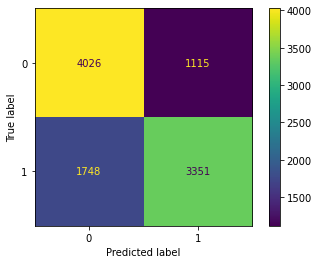

In [874]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix

cm = confusion_matrix(y_test_2, y_LR_pred_standard_data_2)
print(classification_report(y_test_2, y_LR_pred_standard_data_2))
ConfusionMatrixDisplay(cm).plot()

              precision    recall  f1-score   support

           0       0.71      0.76      0.73      5141
           1       0.74      0.69      0.71      5099

    accuracy                           0.72     10240
   macro avg       0.72      0.72      0.72     10240
weighted avg       0.72      0.72      0.72     10240



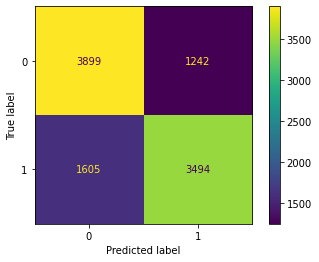

In [876]:
voting_classifier_pred = voting_classifier.predict(standard_X_val_2)

cm = confusion_matrix(y_test_2, voting_classifier_pred)
print(classification_report(y_test_2, voting_classifier_pred))
ConfusionMatrixDisplay(cm).plot()

The scores from two models are quite closed to each other. The reason may be due to that Logistic regression getting more votes in voting_classifier.

## 2.7 "Deploy" - spara modell

In [882]:
df_Deploy = df_categorical_dummies_2.sample(n=100, replace=False, weights=None, random_state=42, axis=0)
df_Deploy.shape

(100, 13)

In [912]:
X, y = df_Deploy.drop(["cardio","id"], axis=1), df_Deploy["cardio"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=30, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((70, 11), (70,), (30, 11), (30,))

In [913]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [920]:
# Create a dataframe for sample test and cover to .csv file
test_samples = pd.DataFrame(scaled_X_test)
test_samples.to_csv("test_samples.csv", index=False)

In [918]:
LR_deploy = LogisticRegression(C=0.1, solver="saga", penalty="l1", max_iter=1000) 
LR_deploy.fit(scaled_X_train, y_train)

LogisticRegression(C=0.1, max_iter=1000, penalty='l1', solver='saga')

In [919]:
import joblib

# Create a model function
joblib.dump(LR_deploy, "LR_deploy_model")

['LR_deploy_model']